<a href="https://colab.research.google.com/github/arash-mehrzadi/information-retrieval-engine/blob/main/%2B(Search_Tree).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Information Retrieval

---


Information Retrieval (IR) can be defined as a software program that deals with the organization, storage, retrieval, and evaluation of information from document repositories, particularly textual information. Information Retrieval is the activity of obtaining material that can usually be documented on an unstructured nature i.e. usually text which satisfies an information need from within large collections which is stored on computers. For example, Information Retrieval can be when a user enters a query into the system. 

In this project, I implement various data recovery techniques with all the operational details and try not to use existing modules and implement all functions.

**Install Modules**



You can use one of the following modules to import the text of the documents into the project .

**python-docx** : python-docx is a Python library for creating and updating Microsoft Word (.docx) files.

More information is available in the [python-docx documentation.](https://python-docx.readthedocs.io/en/latest/)

**docx2txt** : A pure python-based utility to extract text and images from docx files.

More information is available in the [docx2txt documentation.](https://pypi.org/project/docx2txt/)

In [ ]:
pip install python-docx

     |████████████████████████████████| 5.5MB 6.2MB/s 
  Created wheel for python-docx: filename=python_docx-0.8.10-cp36-none-any.whl size=184491 sha256=5beca9247bf087b4e14146e75e7f21bb35c4bc1abf16e65be89203897abc310b
  Stored in directory: /root/.cache/pip/wheels/18/0b/a0/1dd62ff812c857c9e487f27d80d53d2b40531bec1acecfa47b
Successfully built python-docx


In [ ]:
pip install docx2txt

  Created wheel for docx2txt: filename=docx2txt-0.8-cp36-none-any.whl size=3965 sha256=1a4c422a5d5d4660e89e1188e71b2ac603f37b94ef3c6300e8bda1473655f8ee
  Stored in directory: /root/.cache/pip/wheels/b2/1f/26/a051209bbb77fc6bcfae2bb7e01fa0ff941b82292ab084d596
Successfully built docx2txt


**Import Modules**

---



In [ ]:
from docx import Document
import docx2txt
import pandas as pd 
import string
import os

**Import Data**

---



The functions of the **Import Data** section are implemented in such a way that you enter all the documents in (.docx) Format into the project by entering the path of your document folder.

! This system has no limit on the number or volume of documents

In [ ]:
files=[]
Text= []
filesname= [] 
def importDocuments(path):
  for r, d, f in os.walk(path):
      for file in f:
          if '.docx' in file:
              files.append(os.path.join(r, file))
              filesname.append(file.replace(".docx",""))
  print("Documents imported successfully\nDocuments List :\n")
  for f in files:
      Text.append(docx2txt.process(f)) 
      print(f)

In [ ]:
importDocuments(input("input your folder path : "))

input your folder path : /content/drive/My Drive/IR_Data
Documents imported successfully
Documents List :

/content/drive/My Drive/IR_Data/DataScience.docx
/content/drive/My Drive/IR_Data/Piet Mondrian.docx
/content/drive/My Drive/IR_Data/Performance Art.docx


In [ ]:
filesname

['DataScience', 'Piet Mondrian', 'Performance Art']



**Data Prepration**

---



In [ ]:
PText= []
def Prepration(inputtext):
  for ftext in inputtext:
    RRM= ftext.translate(str.maketrans('', '', string.punctuation))
    RRM= RRM.replace("\n","")
    PText.append(RRM.split())

In [ ]:
Prepration(Text)

In [ ]:
PText[1]

['WHO',
 'IS',
 'PIET',
 'MONDRIANPiet',
 'Mondrian',
 'is',
 'a',
 'Dutch',
 'artist',
 'best',
 'known',
 'for',
 'his',
 'abstract',
 'paintings',
 'Art',
 'that',
 'is',
 'abstract',
 'does',
 'not',
 'show',
 'things',
 'that',
 'are',
 'recognisable',
 'such',
 'as',
 'people',
 'objects',
 'or',
 'landscapes',
 'Instead',
 'artists',
 'use',
 'colours',
 'shapes',
 'and',
 'textures',
 'to',
 'achieve',
 'their',
 'effectAs',
 'well',
 'as',
 'abstract',
 'art',
 'Mondrian',
 'was',
 'also',
 'passionate',
 'about',
 'dancing',
 'Apparently',
 'he',
 'didnt',
 'like',
 'slow',
 'traditional',
 'dances',
 'like',
 'waltzes',
 'or',
 'tango',
 'but',
 'enjoyed',
 'high',
 'energy',
 'fast',
 'dancing',
 'styles',
 'He',
 'even',
 'called',
 'one',
 'of',
 'his',
 'abstract',
 'paintings',
 'Broadway',
 'Boogie',
 'Woogie',
 'after',
 'a',
 'popular',
 'dance',
 'of',
 'the',
 'timeWhen',
 'Mondrian',
 'made',
 'his',
 'paintings',
 'he',
 'would',
 'always',
 'mix',
 'his',
 'own'



**Create Table**

---



In [ ]:
Data_dic= {}
def df_CSV():
  a= len(filesname)
  b= 0
  Table= pd.DataFrame(Data_F,columns=['Word','Document'])
  while b< len(filesname):
    AT= Table.loc[Table['Document'] == filesname[b]]
    b+= 1
    a-= 1
    AT= AT.drop_duplicates(subset=['Word'])
    AT= AT.reset_index(drop=True)
    Data_dic[filesname[b-1]]= AT

In [ ]:
Data_F= []
def CreateTable(inputdata,docname):
  #Data_F=[len(docname)]
  i= 0
  a= len(docname)
  while a!= 0:
    Words_count= len(inputdata[a-1])
    a-= 1
    while Words_count != 0 :
      ipt=[inputdata[a][Words_count-1],docname[a]]
      Data_F.append(ipt)
      Words_count= Words_count-1
      i+=1
    df_CSV()

In [ ]:
CreateTable(PText, filesname)

In [ ]:
Data_dic['Performance Art']

,Word,Document
0,Nevada,Performance Art
1,Desert,Performance Art
2,Rock,Performance Art
3,Black,Performance Art
4,the,Performance Art
...,...,...
298,features,Performance Art
299,typically,Performance Art
300,timebased,Performance Art
301,artPerformance,Performance Art


In [ ]:
def Merge(input_table):
  a=0
  if a == 0:
    output_table= pd.merge(input_table[filesname[a]], input_table[filesname[a+1]],on='Word',how='outer')
    a+= 2
  
  while a!= len(filesname):
    output_table = output_table.append(pd.merge(output_table, Data_dic[filesname[a]],on='Word',how='outer'))
    a+= 1
  return output_table

In [ ]:
def fix_t(In_Da, fname):
  for name in fname:
    In_Da[name].columns= ['Word',name]
  return In_Da

In [ ]:
Data_dic= fix_t(Data_dic, filesname)

In [ ]:
Data_dic['DataScience']

,Word,DataScience
0,articles,DataScience
1,future,DataScience
2,in,DataScience
3,concepts,DataScience
4,deeper,DataScience
...,...,...
640,KIAU22An,DataScience
641,Community,DataScience
642,Engineering,DataScience
643,KIAUComputer,DataScience


In [ ]:
MData= Merge(Data_dic)

In [ ]:
MData

,Word,DataScience,Piet Mondrian,Performance Art
0,articles,DataScience,NaN,NaN
1,future,DataScience,NaN,NaN
2,in,DataScience,Piet Mondrian,NaN
3,concepts,DataScience,NaN,NaN
4,deeper,DataScience,NaN,NaN
...,...,...,...,...
1004,onlookers,NaN,NaN,Performance Art
1005,typically,NaN,NaN,Performance Art
1006,timebased,NaN,NaN,Performance Art
1007,artPerformance,NaN,NaN,Performance Art


In [ ]:
def SetValue(IN_D,IN_N):
  for name in IN_N:
    print(name)
    IN_D.loc[IN_D[name]== name, name] = 1
    IN_D = IN_D.reset_index(drop=True)
  return IN_D

In [ ]:
filesname

['DataScience', 'Piet Mondrian', 'Performance Art']

In [ ]:
termdocument= SetValue(MData, filesname)
termdocument= termdocument.fillna(0)
termdocument

DataScience
Piet Mondrian
Performance Art


,Word,DataScience,Piet Mondrian,Performance Art
0,articles,1,0,0
1,future,1,0,0
2,in,1,1,0
3,concepts,1,0,0
4,deeper,1,0,0
...,...,...,...,...
1782,onlookers,0,0,1
1783,typically,0,0,1
1784,timebased,0,0,1
1785,artPerformance,0,0,1


In [ ]:
termdocument.head

<bound method NDFrame.head of                 Word  DataScience  Piet Mondrian  Performance Art
0           articles            1              0                0
1             future            1              0                0
2                 in            1              1                0
3           concepts            1              0                0
4             deeper            1              0                0
...              ...          ...            ...              ...
1782       onlookers            0              0                1
1783       typically            0              0                1
1784       timebased            0              0                1
1785  artPerformance            0              0                1
1786     Performance            0              0                1

[1787 rows x 4 columns]>

In [ ]:
termdocument.columns

Index(['Word', 'DataScience', 'Piet Mondrian', 'Performance Art'], dtype='object')



**term document incidence matrix**


---



In [ ]:
termdocument_Matrix= termdocument.to_numpy()

In [ ]:
termdocument_Matrix[0:30]

array([['articles', 1, 0, 0],
       ['future', 1, 0, 0],
       ['in', 1, 1, 0],
       ['concepts', 1, 0, 0],
       ['deeper', 1, 0, 0],
       ['over', 1, 0, 0],
       ['go', 1, 1, 0],
       ['to', 1, 1, 0],
       ['try', 1, 0, 0],
       ['will', 1, 0, 0],
       ['We', 1, 0, 0],
       ['field', 1, 0, 0],
       ['this', 1, 1, 0],
       ['of', 1, 1, 0],
       ['terms', 1, 0, 0],
       ['important', 1, 1, 0],
       ['and', 1, 1, 0],
       ['basic', 1, 0, 0],
       ['most', 1, 0, 0],
       ['the', 1, 1, 0],
       ['some', 1, 0, 0],
       ['explain', 1, 0, 0],
       ['tried', 1, 0, 0],
       ['we', 1, 0, 0],
       ['article', 1, 0, 0],
       ['In', 1, 1, 0],
       ['scientist', 1, 0, 0],
       ['data', 1, 0, 0],
       ['every', 1, 0, 0],
       ['for', 1, 1, 0]], dtype=object)


**Inverted Indexes**

---



In [ ]:
IIList= termdocument.values.tolist()
IIList[0:5]

[['articles', 1, 0, 0],
 ['future', 1, 0, 0],
 ['in', 1, 1, 0],
 ['concepts', 1, 0, 0],
 ['deeper', 1, 0, 0]]

In [ ]:
len(IIList[0])

4

In [ ]:
def I_I_T(dlist):
  l= len(dlist[0])-1
  dl= []
  for i in dlist:
    for a in range(1, len(i)):
      if i[a]== 1:
        i[a]= a
      if i[a]== 0:
        i[a]= ""
    dl.append(i)
  return dl


In [ ]:
Inverted_Index= I_I_T(IIList)

In [ ]:
Inverted_Index[:10]

[['articles', 1, '', ''],
 ['future', 1, '', ''],
 ['in', 1, 2, ''],
 ['concepts', 1, '', ''],
 ['deeper', 1, '', ''],
 ['over', 1, '', ''],
 ['go', 1, 2, ''],
 ['to', 1, 2, ''],
 ['try', 1, '', ''],
 ['will', 1, '', '']]

In [ ]:
def RemoveNull(D_IN):
  D_out= []
  for r in D_IN:
    while ("" in r):
      r.remove("")
    D_out.append(r)
  return D_out

In [ ]:
Inverted_Index= RemoveNull(Inverted_Index)

In [ ]:
Inverted_Index[:10]

[['articles', 1],
 ['future', 1],
 ['in', 1, 2],
 ['concepts', 1],
 ['deeper', 1],
 ['over', 1],
 ['go', 1, 2],
 ['to', 1, 2],
 ['try', 1],
 ['will', 1]]

**List Post**

---



In [ ]:
def ClP(Data_in):
  D_out= []
  a= 0
  for i in Data_in:
    D_out.append([a,i])
    a+= 1
  return D_out


In [ ]:
def  Coll(Data_in):
  Data_out= []
  for i in Data_in:
    Data_out.append(ClP(i))
  return Data_out

In [ ]:
cLP = Coll(PText)

In [ ]:
cLP[0][0:5]

[[0, 'Computer'],
 [1, 'Engineering'],
 [2, 'Community'],
 [3, 'KIAUComputer'],
 [4, 'Engineering']]

In [ ]:
def Create_listPost(Data_in,doc_name):
  Data_out= []
  a= 0
  for i in Data_in:
    Data_out.append(pd.DataFrame(i,columns=['Position',doc_name[a]])) 
    Data_out[a] = Data_out[a]['Position'].groupby([Data_out[a][doc_name[a]]]).apply(list).reset_index()
    a+= 1
  return Data_out

In [ ]:
cLP= Create_listPost(cLP,filesname)

In [ ]:
Table = cLP[0]['Position'].groupby([cLP[0]['DataScience']]).apply(list).reset_index()

In [ ]:
cLP[0]

,DataScience,Position
0,According,[1704]
1,Afterwards,[1394]
2,All,[409]
3,Amazon,"[1510, 1512]"
4,Arash,[12]
...,...,...
640,you,"[71, 102, 244, 313, 401, 1017, 1025, 1042, 108..."
641,your,"[193, 200, 204, 207, 1228, 1366]"
642,“a,[953]
643,“horse”,[1454]


In [ ]:
cLP[1][10:20]

,Piet Mondrian,Position
10,In,[338]
11,Instead,[32]
12,It,[228]
13,MONDRIANPiet,[3]
14,Mondrian,"[4, 47, 89, 172, 207, 271, 316, 324, 345]"
15,Netherlands,[293]
16,Notice,[151]
17,PIET,[2]
18,Paris,"[258, 319]"
19,ParisThis,[312]


In [ ]:
cLP[2][50:60]

,Performance Art,Position
50,Huan,[477]
51,II,[346]
52,Idea,[121]
53,In,"[91, 127, 347, 386, 418]"
54,It,"[35, 83, 435]"
55,John,[360]
56,Joseph,[123]
57,Laurie,[100]
58,Man,"[488, 496]"
59,Marina,[153]


**Search Words**


---



In [ ]:
SW= input("input your search Word:")
SD= input("input your Document name:")

input your search Word:In
input your Document name:Performance Art


In [ ]:
docindex= filesname.index(SD)
SR= cLP[docindex].loc[cLP[docindex][filesname[docindex]]==SW]
po= SR.iloc[0]['Position']
print("Positions : {} \nPosition Count : {}".format(po, len(po)))

Positions : [91, 127, 347, 386, 418] 
Position Count : 5


# **Word Search Tree**

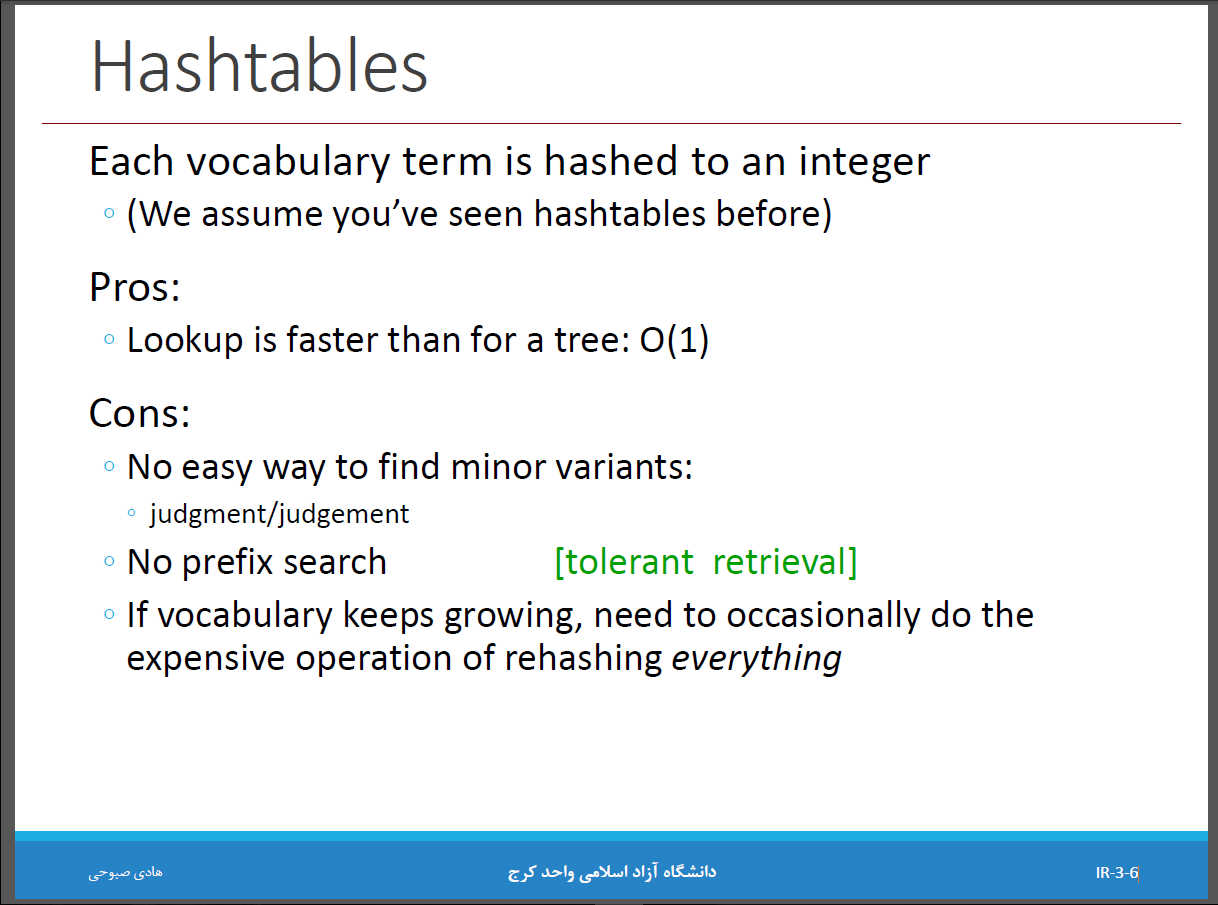

**All words in this document are extracted and stored in a list**

**My name is also saved in the list !**

---



In [28]:
wlist= ['A',
'an',
'Assume',
'before',
'Cons',
'Do',
'Each',
'Easy',
'everything',
'Expensive',
'Faster',
'Find',
'For',
'Growing',
'hashed', 
'Hashtables',
'If',
'integer',
'Is',
'judgement',
'judgment',
'Keeps',
'Lookup',
'Minor',
'Need',
'No',
'Occasionally',
'Of',
'Operation',
'Prefix',
'Pros',
'Rehashing',
'retrieval',
'Search',
'Seen',
'Term',
'Than',
'The',
'to', 
'Tolerant',
'tree',
'variants',
'Vocabulary',
'Way',
'We',
'you’ve',
'Arash',
'Mehrzadi']

In [29]:
for i in range(len(wlist)):
  print("-{}  {}".format(i+1,wlist[i]))
print("-------------------------------","\n Num. Words : {}".format(len(wlist)))

-1  A
-2  an
-3  Assume
-4  before
-5  Cons
-6  Do
-7  Each
-8  Easy
-9  everything
-10  Expensive
-11  Faster
-12  Find
-13  For
-14  Growing
-15  hashed
-16  Hashtables
-17  If
-18  integer
-19  Is
-20  judgement
-21  judgment
-22  Keeps
-23  Lookup
-24  Minor
-25  Need
-26  No
-27  Occasionally
-28  Of
-29  Operation
-30  Prefix
-31  Pros
-32  Rehashing
-33  retrieval
-34  Search
-35  Seen
-36  Term
-37  Than
-38  The
-39  to
-40  Tolerant
-41  tree
-42  variants
-43  Vocabulary
-44  Way
-45  We
-46  you’ve
-47  Arash
-48  Mehrzadi
------------------------------- 
 Num. Words : 48


In [30]:
from collections import defaultdict


class My_TreeNode():

    def __init__(self):
        self.children = defaultdict()
        self.terminating = False


class My_Tree():

    def __init__(self):
        self.root = self.get_node()

    def get_node(self):
        return My_TreeNode()

    def get_index(self, ch):
        return ord(ch) - ord('a')

    def insert(self, word):

        root = self.root
        len1 = len(word)

        for i in range(len1):
            index = self.get_index(word[i])

            if index not in root.children:
                root.children[index] = self.get_node()
            root = root.children.get(index)
        root.terminating = True

    def search(self, word, Mode):
        root = self.root
        len1 = len(word) 
        for i in range(len1):
            index = self.get_index(word[i])
            
            if not root:
                return False
            root = root.children.get(index)
            if Mode == 'traversal':
               print(root,root.terminating)
        return True if root and root.terminating else False
    def delete(self, word):

        root = self.root
        len1 = len(word)

        for i in range(len1):
            index = self.get_index(word[i])

            if not root:
                print ("Word not found")
                return -1
            root = root.children.get(index)

        if not root:
            print ("Word not found")
            return -1
        else:
            root.terminating = False
            return 0

    def update(self, old_word, new_word):
        val = self.delete(old_word)
        if val == 0:
            self.insert(new_word)

    

if __name__ == "__main__":

    strings = wlist

    t = My_Tree()
    for word in strings:
        t.insert(word)

**In this section, I check all the words in the document**

In [31]:
for i in wlist:
  print('Search - {} :'.format(i),t.search(i,'Simple'))

Search - A : True
Search - an : True
Search - Assume : True
Search - before : True
Search - Cons : True
Search - Do : True
Search - Each : True
Search - Easy : True
Search - everything : True
Search - Expensive : True
Search - Faster : True
Search - Find : True
Search - For : True
Search - Growing : True
Search - hashed : True
Search - Hashtables : True
Search - If : True
Search - integer : True
Search - Is : True
Search - judgement : True
Search - judgment : True
Search - Keeps : True
Search - Lookup : True
Search - Minor : True
Search - Need : True
Search - No : True
Search - Occasionally : True
Search - Of : True
Search - Operation : True
Search - Prefix : True
Search - Pros : True
Search - Rehashing : True
Search - retrieval : True
Search - Search : True
Search - Seen : True
Search - Term : True
Search - Than : True
Search - The : True
Search - to : True
Search - Tolerant : True
Search - tree : True
Search - variants : True
Search - Vocabulary : True
Search - Way : True
Search - We

**I check some missing words in the document to make sure the algorithm is working properly**

In [32]:
outlier_list= ['Data','Programming','python','competition','dd']

In [33]:
for i in outlier_list:
  print('Search - {} :'.format(i),t.search(i,'Simple'))

Search - Data : False
Search - Programming : False
Search - python : False
Search - competition : False
Search - dd : False


**Search All Steps**

**Tree traversal**

In [34]:
t.search('Arash','traversal')

<__main__.My_TreeNode object at 0x7f5f26dd0eb8> True
<__main__.My_TreeNode object at 0x7f5f26dbc358> False
<__main__.My_TreeNode object at 0x7f5f26dbc390> False
<__main__.My_TreeNode object at 0x7f5f26dbc3c8> False
<__main__.My_TreeNode object at 0x7f5f26dbc400> True


True

In [35]:
t.search('Operation','traversal')

<__main__.My_TreeNode object at 0x7f5f26db2828> False
<__main__.My_TreeNode object at 0x7f5f26db2588> False
<__main__.My_TreeNode object at 0x7f5f26db25c0> False
<__main__.My_TreeNode object at 0x7f5f26db2320> False
<__main__.My_TreeNode object at 0x7f5f26db23c8> False
<__main__.My_TreeNode object at 0x7f5f26db2358> False
<__main__.My_TreeNode object at 0x7f5f26db26d8> False
<__main__.My_TreeNode object at 0x7f5f26db2780> False
<__main__.My_TreeNode object at 0x7f5f26db27b8> True


True

In [36]:
t.search('integer','traversal')

<__main__.My_TreeNode object at 0x7f5f26db6128> False
<__main__.My_TreeNode object at 0x7f5f26db6160> False
<__main__.My_TreeNode object at 0x7f5f26db6198> False
<__main__.My_TreeNode object at 0x7f5f26db6080> False
<__main__.My_TreeNode object at 0x7f5f26db60b8> False
<__main__.My_TreeNode object at 0x7f5f26db6048> False
<__main__.My_TreeNode object at 0x7f5f26db6c50> True


True

# **Search Tree Diagram**
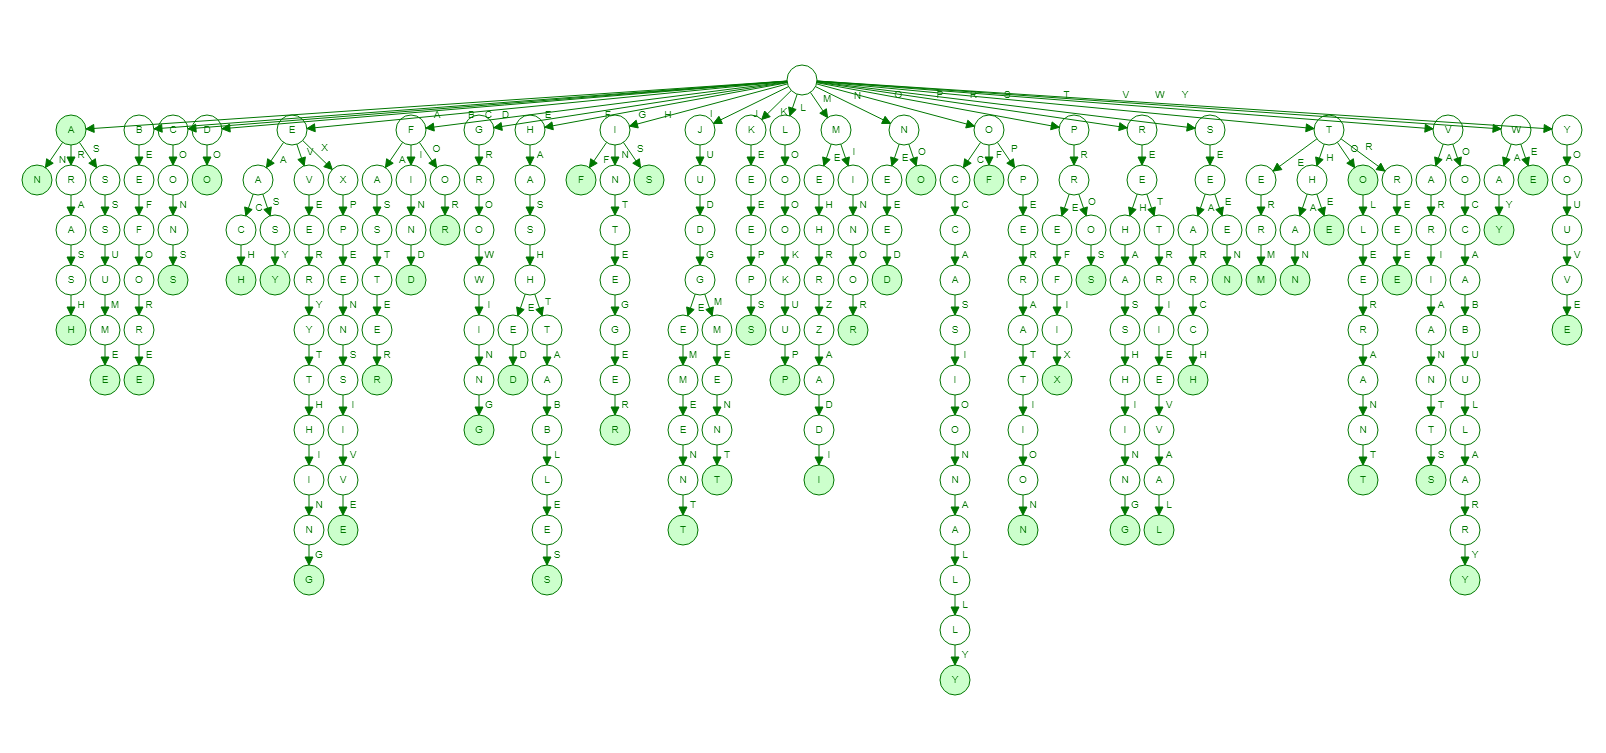

### *Various search methods will be implemented soon ...*